# Model Analysis
This is an analysis of different types of **Classfication models** performed on Walmart Trip Type classfication problem.

Since the number of triptypes were 38, it has been reduced to 5 triptypes which has almost equal bins.

This analysis is as follows. 
1. Feature Engineering.
2. Test Train Split
3. K Nearest Neighbours Classifier
4. Logistic Regression Classifier
5. Naive Bayes Classifier
6. Decision Tree Classifier
7. SVM Classifier
8. Random Forest Classifier
9. LDA Classifier

Each of the above classifier will have reported 
- classification accuracy
- confusion matrix
- classification report


In [59]:
#import statements
import pandas as pd
import numpy as np
import re 

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.lda import LDA
from matplotlib import pyplot as plt
%matplotlib inline


#importing the data into the notebook
train_data = pd.read_csv("/resources/data/kdd/project/data/fiveclasses_train.csv")
train_data.head()



,Unnamed: 0,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,572389,38,170528,4,4.900005e+09,2,DSD GROCERY,9570.0
1,185055,37,55398,6,2.015450e+10,1,SERVICE DELI,8001.0
2,474946,37,141533,6,4.300020e+09,2,GROCERY DRY GOODS,4306.0
3,412325,36,122269,3,2.279692e+09,1,PERSONAL CARE,5070.0
4,249953,36,73972,2,7.958200e+09,1,DSD GROCERY,3458.0


## 1. Feature Engineering

In [60]:
features = ["Weekday", "NumItems", "Return", 'ACCESSORIES',
       'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
       'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
       'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING',  'MENSWEAR',
       'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
       'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
       'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
       'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
       'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
       'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
       'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']
#Feature Building
def transform_my_data(data):
    
    dummies = pd.get_dummies(data.DepartmentDescription)
    data[dummies.columns] = dummies 
    data_dummies = data.iloc[:,7:]
    data_dummies = data_dummies.apply(lambda x: x*data["ScanCount"])
    data_dummies = data_dummies.replace(-0,0)

    data.loc[data.ScanCount < 0, 'Return'] = 1
    data.loc[data.Return != 1, 'Return'] = 0
    data = data[["TripType", "VisitNumber", "Weekday", "ScanCount", "Return"]]
    data = data.rename(columns={"ScanCount":"NumItems"})
    data = pd.concat([data, data_dummies], axis=1)
    grouped = data.groupby("VisitNumber")
    grouped = grouped.agg({'Weekday': np.max, "TripType": np.max, 'NumItems': np.sum, 'Return': np.max, 
              '1-HR PHOTO': np.sum, 'ACCESSORIES': np.sum,
       'AUTOMOTIVE': np.sum, 'BAKERY': np.sum, 'BATH AND SHOWER': np.sum, 'BEAUTY': np.sum, 'BEDDING': np.sum,
       'BOOKS AND MAGAZINES': np.sum, 'BOYS WEAR': np.sum, 'BRAS & SHAPEWEAR': np.sum,
       'CAMERAS AND SUPPLIES': np.sum, 'CANDY, TOBACCO, COOKIES': np.sum, 'CELEBRATION': np.sum,
       'COMM BREAD': np.sum, 'CONCEPT STORES': np.sum, 'COOK AND DINE': np.sum, 'DAIRY': np.sum, 'DSD GROCERY': np.sum,
       'ELECTRONICS': np.sum, 'FABRICS AND CRAFTS': np.sum, 'FINANCIAL SERVICES': np.sum,
       'FROZEN FOODS': np.sum, 'FURNITURE': np.sum, 'GIRLS WEAR, 4-6X  AND 7-14': np.sum,
       'GROCERY DRY GOODS': np.sum, 'HARDWARE': np.sum, 'HEALTH AND BEAUTY AIDS': np.sum, 'HOME DECOR': np.sum,
       'HOME MANAGEMENT': np.sum, 'HORTICULTURE AND ACCESS': np.sum,
       'HOUSEHOLD CHEMICALS/SUPP': np.sum, 'HOUSEHOLD PAPER GOODS': np.sum,
       'IMPULSE MERCHANDISE': np.sum, 'INFANT APPAREL': np.sum, 'INFANT CONSUMABLE HARDLINES': np.sum,
       'JEWELRY AND SUNGLASSES': np.sum, 'LADIES SOCKS': np.sum, 'LADIESWEAR': np.sum,
       'LARGE HOUSEHOLD GOODS': np.sum, 'LAWN AND GARDEN': np.sum, 'LIQUOR,WINE,BEER': np.sum,
       'MEAT - FRESH & FROZEN': np.sum, 'MEDIA AND GAMING': np.sum,'MENSWEAR': np.sum,
       'OFFICE SUPPLIES': np.sum, 'OPTICAL - FRAMES': np.sum, 'OPTICAL - LENSES': np.sum,
       'OTHER DEPARTMENTS': np.sum, 'PAINT AND ACCESSORIES': np.sum, 'PERSONAL CARE': np.sum,
       'PETS AND SUPPLIES': np.sum, 'PHARMACY OTC': np.sum, 'PHARMACY RX': np.sum,
       'PLAYERS AND ELECTRONICS': np.sum, 'PLUS AND MATERNITY': np.sum, 'PRE PACKED DELI': np.sum,
       'PRODUCE': np.sum, 'SEAFOOD': np.sum, 'SEASONAL': np.sum, 'SERVICE DELI': np.sum, 'SHEER HOSIERY': np.sum,
       'SHOES': np.sum, 'SLEEPWEAR/FOUNDATIONS': np.sum, 'SPORTING GOODS': np.sum,
       'SWIMWEAR/OUTERWEAR': np.sum, 'TOYS': np.sum, 'WIRELESS': np.sum})
    data = grouped[["TripType", "Weekday", "NumItems", "Return",'1-HR PHOTO', 'ACCESSORIES',
           'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
           'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
           'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
           'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
           'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
           'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
           'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS', 'HOME DECOR',
           'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
           'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
           'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
           'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
           'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
           'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENSWEAR',
           'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
           'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
           'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
           'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
           'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
           'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
           'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']]
    
    
    #data.head()
    return data

train_data=transform_my_data(train_data)
train_data.shape
#train_data.head()

(15182, 71)

## 2. Test and Train Split

In [61]:
#Data preprocesssing dropping na and splitting data into test and train
train, test = train_test_split(train_data, test_size = 0.3)
test=test.dropna()
train=train.dropna()
train_data = train
train_data.describe()
train_data.shape

(10627, 71)

In [62]:
#Data preprocesssing
#Transforming qualitative variables into quantitative
def transform(day,no):
    global train_data
    train_data=train_data.replace(day,no)
    return;
transform("Monday", 1)
transform("Tuesday", 2)
transform("Wednesday", 3)
transform("Thursday", 4)
transform("Friday", 5)
transform("Saturday", 6)
transform("Sunday", 7)

#Removing redundency in department description column
train_data=train_data.replace("MENS WEAR","MENSWEAR")

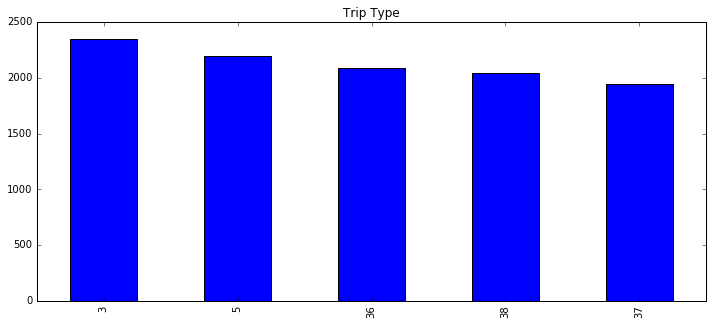

In [63]:

#ploting the histogram for the trip type 
#data_tripty = train_data.drop_duplicates("VisitNumber")
plt.figure(figsize=(12,5))
train_data['TripType'].value_counts().plot('bar',title="Trip Type")

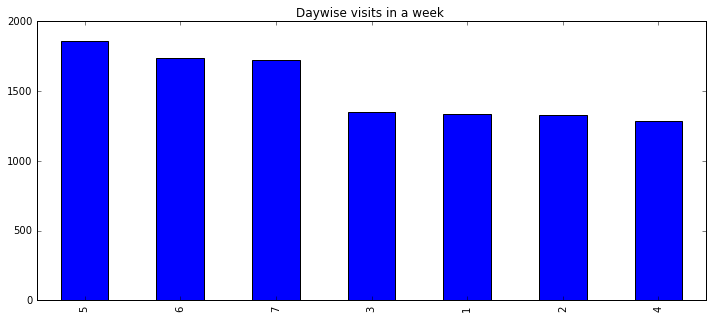

In [64]:
#ploting histogram for daywise visits
#data_tripwd = train_data.drop_duplicates("VisitNumber")
plt.figure(figsize=(12,5))
train_data['Weekday'].value_counts().plot('bar',title="Daywise visits in a week ")

In [65]:
train_data.T.apply(lambda x: x.nunique(),axis=1)

TripType                       5
Weekday                        7
NumItems                      67
Return                         2
1-HR PHOTO                     5
ACCESSORIES                    4
AUTOMOTIVE                     7
BAKERY                         7
BATH AND SHOWER                8
BEAUTY                        20
BEDDING                        4
BOOKS AND MAGAZINES            4
BOYS WEAR                      4
BRAS & SHAPEWEAR               4
CAMERAS AND SUPPLIES           2
CANDY, TOBACCO, COOKIES        8
CELEBRATION                   11
COMM BREAD                    12
CONCEPT STORES                 2
COOK AND DINE                 10
DAIRY                         20
DSD GROCERY                   18
ELECTRONICS                    6
FABRICS AND CRAFTS             7
FINANCIAL SERVICES            14
FROZEN FOODS                  14
FURNITURE                      3
GIRLS WEAR, 4-6X  AND 7-14     5
GROCERY DRY GOODS             33
HARDWARE                       4
          

In [66]:
#train_data_dup = train_data.drop_duplicates("VisitNumber")
def get_count(values):
    return len(values)
grouped_count = train_data.groupby(['Weekday',"TripType"]).TripType.agg(get_count)
grouped_count

Weekday  TripType
1        3           260
         5           269
         36          250
         37          268
         38          287
2        3           306
         5           283
         36          248
         37          226
         38          266
3        3           312
         5           299
         36          251
         37          219
         38          268
4        3           254
         5           313
         36          258
         37          220
         38          241
5        3           527
         5           382
         36          351
         37          290
         38          313
6        3           400
         5           351
         36          381
         37          321
         38          288
7        3           293
         5           303
         36          352
         37          400
         38          377
Name: TripType, dtype: int64

In [67]:
#KNN classifier

knc = KNeighborsClassifier(n_neighbors=5)
knc = knc.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))

predictions = knc.predict(np.asarray(test[features]))

In [68]:
#Accuracy of KNN

accuracy_score(test.TripType,predictions )

0.86937431394072451

In [69]:
#pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

             precision    recall  f1-score   support

          3       0.96      0.98      0.97      1027
          5       0.83      0.86      0.85       934
         36       0.87      0.83      0.85       894
         37       0.86      0.84      0.85       838
         38       0.81      0.82      0.81       862

avg / total       0.87      0.87      0.87      4555



In [70]:
#Logistic Regression

train_data.TripType = train_data.TripType.astype(float)
train_data.Weekday = train_data.Weekday.astype(float)  
                         
test.TripType = test.TripType.astype(float)
test.Weekday = test.Weekday.astype(float)  


In [71]:
lr = LogisticRegression()
lr.fit(X = np.asarray(train_data[features]), y = np.asarray(train_data.TripType))



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
predictions = lr.predict(np.asarray(test[features]))

In [73]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3.0,5.0,36.0,37.0,38.0,All
True,,,,,,
3.0,1011,13,1,1,1,1027
5.0,15,824,56,11,28,934
36.0,11,71,783,8,21,894
37.0,2,8,14,730,84,838
38.0,6,27,22,66,741,862
All,1045,943,876,816,875,4555


In [74]:
#Accuracy of logistic regression
accuracy_score(test.TripType,predictions )

0.89769484083424811

In [75]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

             precision    recall  f1-score   support

        3.0       0.97      0.98      0.98      1027
        5.0       0.87      0.88      0.88       934
       36.0       0.89      0.88      0.88       894
       37.0       0.89      0.87      0.88       838
       38.0       0.85      0.86      0.85       862

avg / total       0.90      0.90      0.90      4555



In [76]:
#Naive Bayes


In [77]:
gnb = GaussianNB()

gnb = gnb.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))
prediction = gnb.predict(np.asarray(test[features]))



In [78]:
#Accuracy of naive Bayes
accuracy_score(test.TripType,prediction )

0.59187705817782654

In [79]:
pd.crosstab(test.TripType,prediction , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3.0,5.0,36.0,37.0,38.0,All
True,,,,,,
3.0,973,1,15,4,34,1027
5.0,305,374,73,14,168,934
36.0,44,279,291,16,264,894
37.0,1,3,18,284,532,838
38.0,3,4,31,50,774,862
All,1326,661,428,368,1772,4555


In [80]:
accuracy_score(test.TripType,prediction )

0.59187705817782654

In [81]:
# Decision Tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))
predictions = clf.predict(np.asarray(test[features]))

In [82]:
#Accuracy of Decision Tree
accuracy_score(test.TripType,predictions )

0.85971459934138306

In [83]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

             precision    recall  f1-score   support

        3.0       0.98      0.98      0.98      1027
        5.0       0.83      0.85      0.84       934
       36.0       0.85      0.82      0.84       894
       37.0       0.83      0.83      0.83       838
       38.0       0.78      0.80      0.79       862

avg / total       0.86      0.86      0.86      4555



In [84]:
#SVM

clf = svm.SVC(decision_function_shape='ovr')
clf = clf.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))

In [85]:
predictions = clf.predict(np.asarray(test[features]))

In [86]:
#Accuracy of SVM
accuracy_score(test.TripType,predictions )

0.89352360043907797

In [87]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3.0,5.0,36.0,37.0,38.0,All
True,,,,,,
3.0,1006,16,3,1,1,1027
5.0,10,825,48,14,37,934
36.0,4,80,767,17,26,894
37.0,0,13,12,731,82,838
38.0,2,31,22,66,741,862
All,1022,965,852,829,887,4555


In [88]:
#Random Forest

walmart_rf = RandomForestClassifier(n_estimators=100)
walmart_rf = walmart_rf.fit(np.asarray(train_data[features]), np.asarray(train_data.TripType))
predictions = walmart_rf.predict(np.asarray(test[features]))


In [89]:
#Accuracy of Random Forest
accuracy_score(test.TripType,predictions )


0.89330406147091113

In [90]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

             precision    recall  f1-score   support

        3.0       0.98      0.98      0.98      1027
        5.0       0.87      0.87      0.87       934
       36.0       0.88      0.87      0.87       894
       37.0       0.87      0.90      0.88       838
       38.0       0.86      0.84      0.85       862

avg / total       0.89      0.89      0.89      4555



In [91]:
#LDA

clf = LDA()
clf = clf.fit(np.asarray(train_data[features]), np.asarray(train_data.TripType))
predictions = clf.predict(np.asarray(test[features]))

In [92]:
# Accuracy of LDA
accuracy_score(test.TripType,predictions )

0.86717892425905596

In [93]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

             precision    recall  f1-score   support

        3.0       0.96      0.92      0.94      1027
        5.0       0.77      0.91      0.84       934
       36.0       0.87      0.84      0.86       894
       37.0       0.95      0.77      0.85       838
       38.0       0.81      0.88      0.85       862

avg / total       0.88      0.87      0.87      4555



In [94]:
train_data.head()

,TripType,Weekday,NumItems,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
153940,36.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77578,38.0,3.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138370,36.0,6.0,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
35057,3.0,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132089,36.0,5.0,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
train_data.to_csv("featureData.csv", sep=',')